In [70]:
# load pathology data

import pandas as pd
import numpy as np

file_name='8980HeadNeckClinical_DATA_LABELS_2020-07-16_0720.csv'
df=pd.read_csv(file_name)
cols=['MRN','Encounter Date','Pathology Note','Diagnosis']
df=df[cols]
print (df.columns)
print ('Starting df size:',df.shape[0])

Index(['MRN', 'Encounter Date', 'Pathology Note', 'Diagnosis'], dtype='object')
Starting df size: 7254


In [71]:
### filter mrns to only the ones from progress notes doc
mrn_df=pd.read_csv('HNDB Progress Notes Processed.csv')
mrns_to_use=mrn_df.mrn.unique()

df=df[df['MRN'].isin(mrns_to_use)]
print ('Number of target mrns:',len(mrns_to_use))
print ('Notes after mrn filtering:',df.shape[0])

Number of target mrns: 171
Notes after mrn filtering: 610


In [72]:
# convert diagnosis
print(df.Diagnosis.value_counts())
d={'Positive':1,'Negative':0,'Premalignant':0,'Suspicious/Indeterminate':0}
df['Diagnosis']=df.Diagnosis.map(d)
print(df.Diagnosis.value_counts())

#convert date enc to DateTime
df['Encounter Date']=pd.to_datetime(df['Encounter Date'],infer_datetime_format=True,errors='coerce')
df=df.sort_values(by='Encounter Date')

Positive        349
Negative        147
Premalignant     32
Name: Diagnosis, dtype: int64
1.0    349
0.0    179
Name: Diagnosis, dtype: int64


In [73]:
### create sub dfs for each MRN
unique_mrns=df['MRN'].unique()
ptx_info=[]
for mrn in unique_mrns:
    sub_df=df[df['MRN']==mrn]
    ptx_info.append(sub_df)
print ('Num of patients:',len(ptx_info))

### get days elapsed
from datetime import datetime,timedelta
def time_elapsed(start_date,current_date):
    '''get difference between two datetimes'''
    time=current_date-start_date
    return time

def times_elapsed(df):
    '''from a sorted df with a datetime index get a list of how many days it has been since 1st encounter'''
    start_date=df.iloc[0]['Encounter Date']
    times=[]
    for index,row in df.iterrows():
        current_date=row['Encounter Date']
        time=time_elapsed(start_date,current_date)
        times.append(time.days)
    return times

for index,ptx in enumerate(ptx_info):
    ptx_info[index]['days_elapsed']=times_elapsed(ptx)

# rebuild big df
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)

Num of patients: 160


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# grid=sns.catplot(x='MRN', y="days_elapsed", hue="Diagnosis", jitter=False, 
#                  **{'alpha':.8,'s':2},data=df_rebuilt, height=5, aspect=3)

In [75]:
### combine progress note and path info AND chemo information
# path
path_df=df_rebuilt[['Encounter Date','MRN','Diagnosis']]
path_df.columns=['Encounter Date','mrn','cancer_status']
path_df['source']='Path'

# progress note
pn_df=pd.read_csv('RM_MCs.csv')
pn_df.columns=['Encounter Date','mrn','cancer_status']
pn_df['source']='PN'

#chemo
chemo_df=pd.read_csv('RM_med_dates.csv')
chemo_df['cancer_status']=5
chemo_df.columns=['Encounter Date','mrn','cancer_status']
chemo_df['source']='Meds'


df=path_df.append(pn_df)
df=df.append(chemo_df)
print (df.shape[0])

53305


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [76]:
###
df['Encounter Date']=pd.to_datetime(df['Encounter Date'],infer_datetime_format=True)
df=df.sort_values(by='Encounter Date')
### create sub dfs for each MRN
unique_mrns=df['mrn'].unique()
ptx_info=[]
for mrn in unique_mrns:
    sub_df=df[df['mrn']==mrn]
    ptx_info.append(sub_df)
print ('Num of patients:',len(ptx_info))

### get days elapsed
for index,ptx in enumerate(ptx_info):
    ptx_info[index]['days_elapsed']=times_elapsed(ptx)

# rebuild big df
df_rebuilt=''
for index,ptx in enumerate(ptx_info):
    if index==0:
        df_rebuilt=ptx_info[0]
    else:
        df_rebuilt=df_rebuilt.append(ptx)

print (ptx_info[1])

Num of patients: 171


C:\Users\12488\python\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


           Encounter Date      mrn  cancer_status source  days_elapsed
63    1999-04-01 00:00:00  2460803            0.0     PN             0
64    1999-04-01 00:00:00  2460803            1.0     PN             0
65    2000-03-01 00:00:00  2460803            1.0     PN           335
66    2000-03-01 00:00:00  2460803            1.0     PN           335
67    2000-09-01 00:00:00  2460803            1.0     PN           519
68    2013-12-01 00:00:00  2460803            1.0     PN          5358
69    2014-06-03 00:00:00  2460803            1.0     PN          5542
70    2014-06-09 00:00:00  2460803            1.0     PN          5548
1245  2014-06-10 00:00:00  2460803            1.0   Path          5549
1246  2014-06-23 00:00:00  2460803            1.0   Path          5562
71    2014-06-26 00:00:00  2460803            1.0     PN          5565
21538 2014-07-03 10:00:00  2460803            5.0   Meds          5572
21539 2014-07-03 11:00:00  2460803            5.0   Meds          5572
72    

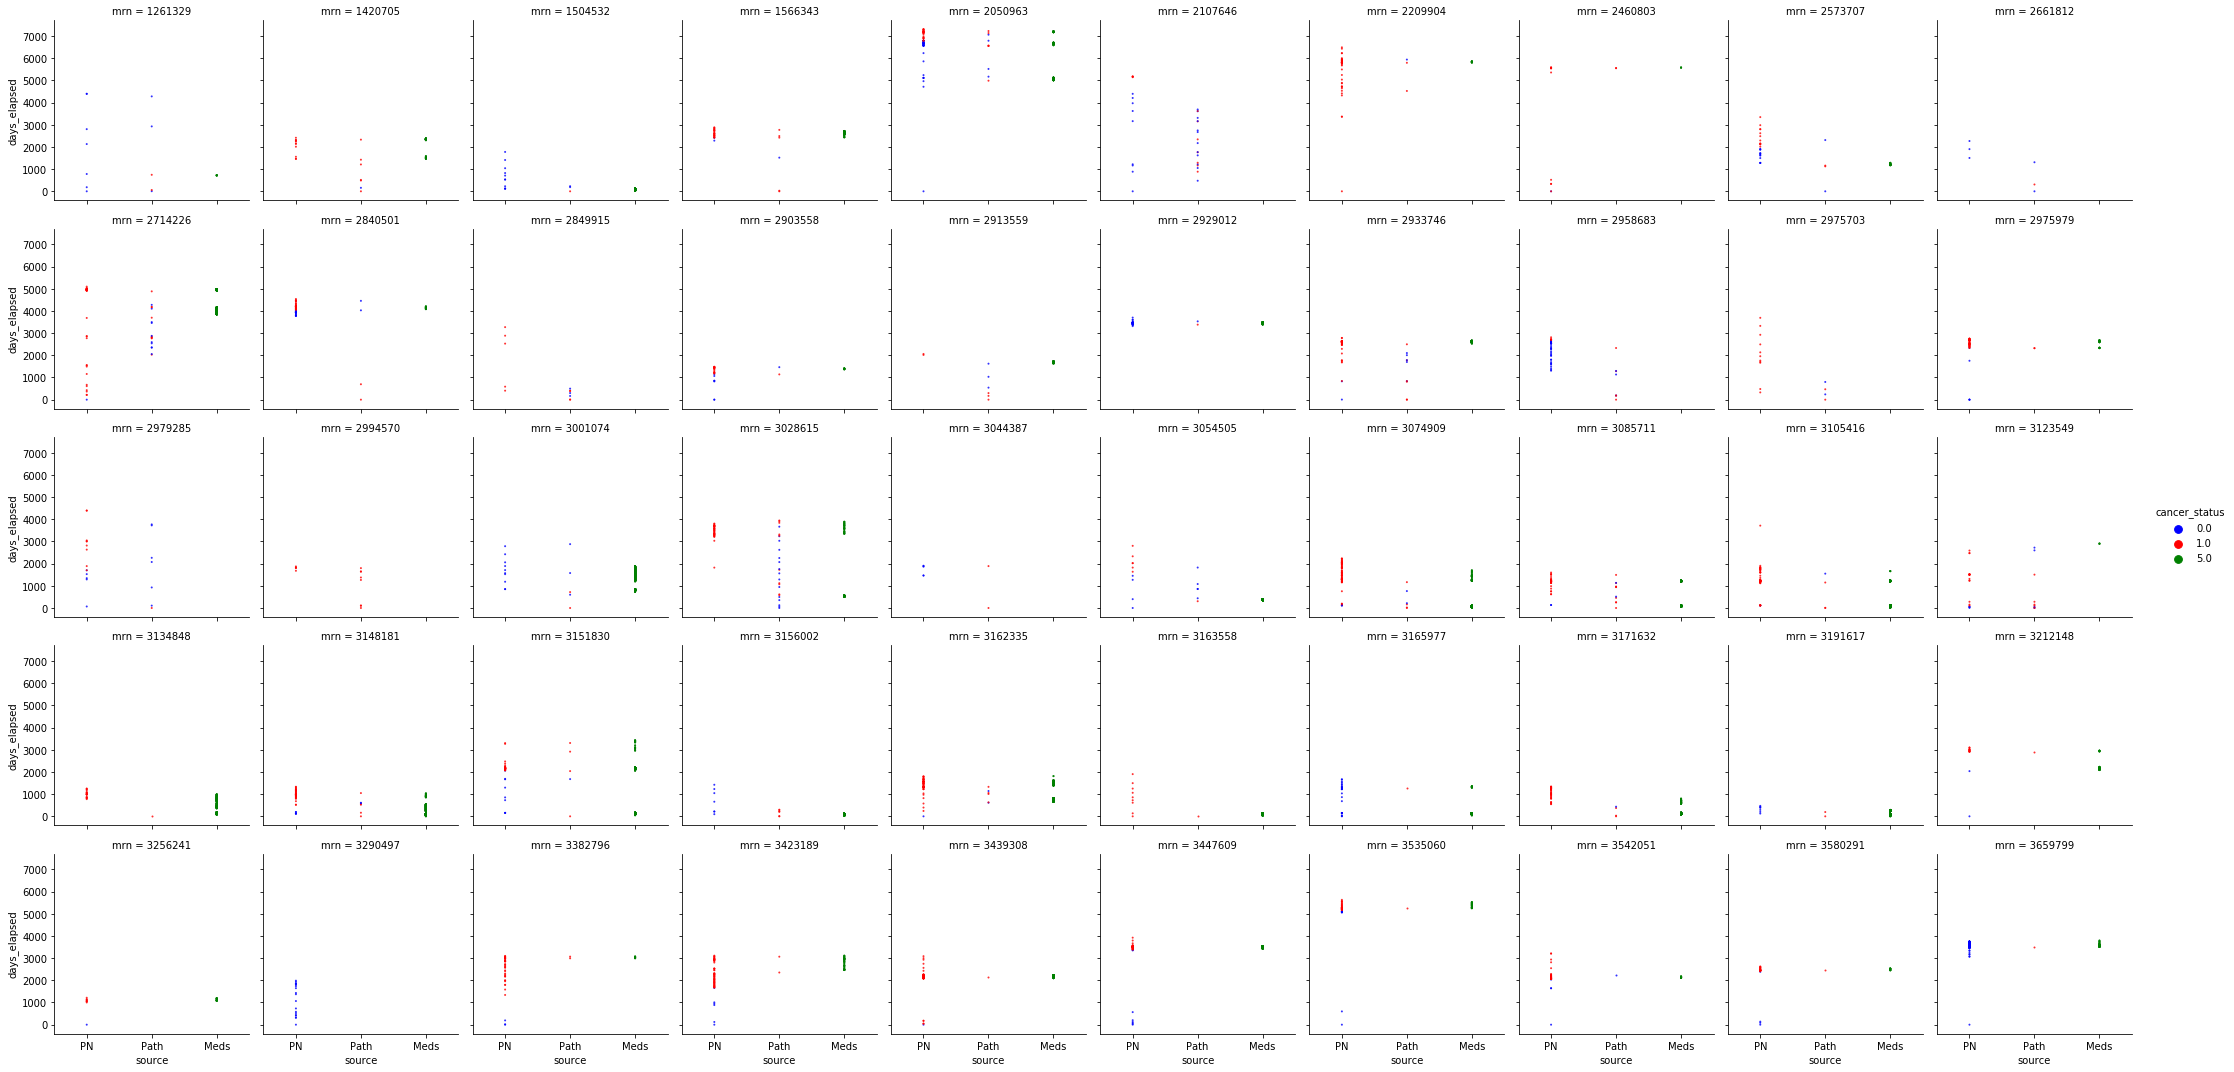

In [78]:
data=[]

for index in range(50):
    if index==0:
        data=ptx_info[index]
    else:
        data=data.append(ptx_info[index])

grid=sns.catplot(x='source', y="days_elapsed", hue="cancer_status", palette={0:'Blue',1:'Red',5:'Green'},
                 jitter=False, **{'alpha':.8,'s':2},data=data, height=3,
                col='mrn',col_wrap=10
                )
plt.savefig('combined_timelines.png')